# Assignment 4: Constructing Confidence Interval

Once you are finished, ensure to complete the following steps.
1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.
2.  Fix any errors which result from this.
3.  Repeat steps 1. and 2. until your notebook runs without errors.
4.  Submit your completed notebook to OWL by the deadline.

## Global Toolbox

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import matplotlib.pyplot as plt
seed=106
np.random.seed(seed)

## Question 1 - <span style="color:green">[100]</span>
You are going to work on a dataset which lists certain attributes of the soccer players participated in the soccer world cup. We want to predict the players value and quantify the uncertainty of our prediction using what we learnt in week 4. The dataset has the following attributes:
- `Age`: Player age in years
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

### Q 1.1 - <span style="color:red">[1]</span> - Load `data.csv` and show the first 5 rows. What is the target attribute?

In [141]:
# Load the data
df = pd.read_csv('A4_data.csv')
df.head()

# The target attribute is the column "Value"

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,87,88,91000000.0,115000.0,Right,4.0,4.0,3.0,Stocky,Reserve,189,82
1,27,86,87,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
2,30,85,85,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
3,31,91,91,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
4,25,86,89,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68


### Q 1.2 - <span style="color:red">[3]</span> - Use a pandas relevant method to reveal `Dtype` of the features and indicate whether the date set has any `Null` values. Also, do you see any categorical attributes? Name them please?

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17591 entries, 0 to 17590
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17591 non-null  int64  
 1   Overall                   17591 non-null  int64  
 2   Potential                 17591 non-null  int64  
 3   Value                     17591 non-null  float64
 4   Wage                      17591 non-null  float64
 5   Preferred Foot            17591 non-null  object 
 6   International Reputation  17591 non-null  float64
 7   Weak Foot                 17591 non-null  float64
 8   Skill Moves               17591 non-null  float64
 9   Body Type                 17591 non-null  object 
 10  Position                  17591 non-null  object 
 11  Height                    17591 non-null  int64  
 12  Weight                    17591 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.7+ MB


#### *Answer*

There is no `Null` value in the data.

Categorical attributes are "Preferred Foot", "Body Type", and "Position".

### Q 1.3 - <span style="color:red">[3]</span> - Use a `pandas` relevant method to get a summary statistics of the data all in one tabular output and inspect it. Which features have the lowest and highest standard deviation respectively? What was the age of the youngest player in the World Cup?

In [143]:
df.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,17591.000000,17591.000000,17591.000000,1.759100e+04,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000,17591.000000
mean,23.109317,63.354954,70.973907,2.759077e+06,8244.784265,1.103405,2.899324,2.300097,180.893639,74.322779
std,4.623732,8.029464,6.523326,7.852143e+06,20502.356045,0.400888,0.663286,0.752437,6.965210,6.982115
min,15.000000,44.000000,47.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,149.000000,48.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,600.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,1.000000,3.000000,2.000000,181.000000,74.000000
75%,26.000000,69.000000,75.000000,1.800000e+06,6000.000000,1.000000,3.000000,3.000000,186.000000,79.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,110.000000


#### *Answer*

`International Reputation` and `Value`. The minimum `Age` was 15.

### Q 1.4 - <span style="color:red">[4]</span> - Use a `pandas` relevant method to see the distribution of the numerical features all in one plot window. Which ones look like Gaussian?

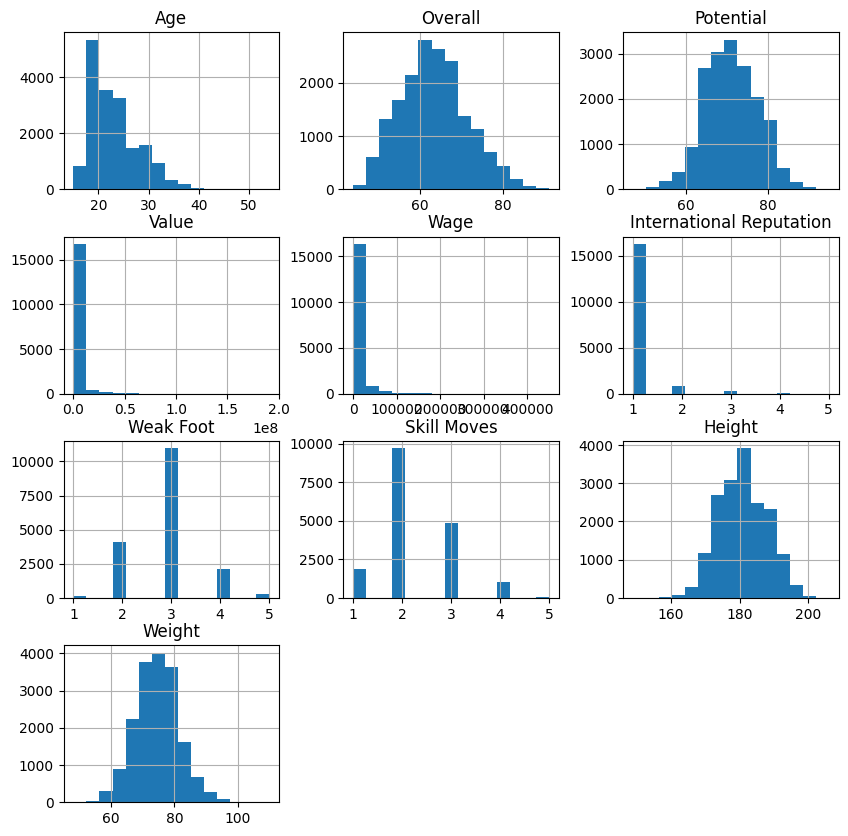

In [144]:
df.hist(bins=15, figsize=(10,10))
plt.show()

#### *Answer*

`Overall`, `Potential`, `Height`, and `Weight`.

### Q 1.5 - <span style="color:red">[2]</span> - Perform one hot encoding on the dataframe to prepare the categorical values for linear regression.

This can be done in different ways, two common methods are [this](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [this](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Note that, in one hot encoding, a categorical attribute with $n$ distinct entries gets replaced with $n-1$ columns with entries of 0 or 1.

In [145]:
df3 = pd.get_dummies(df, drop_first=True)
df3.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Preferred Foot_Right', 'Body Type_Normal',
       'Body Type_Stocky', 'Position_Forward', 'Position_Middle',
       'Position_Reserve'],
      dtype='object')

### Q 1.6 - <span style="color:red">[4]</span> - Use `seaborn.jointplot` to plot marginal histograms to investigate the relationship between `Overall` and `Value` as well as `Wage` and `Value`.

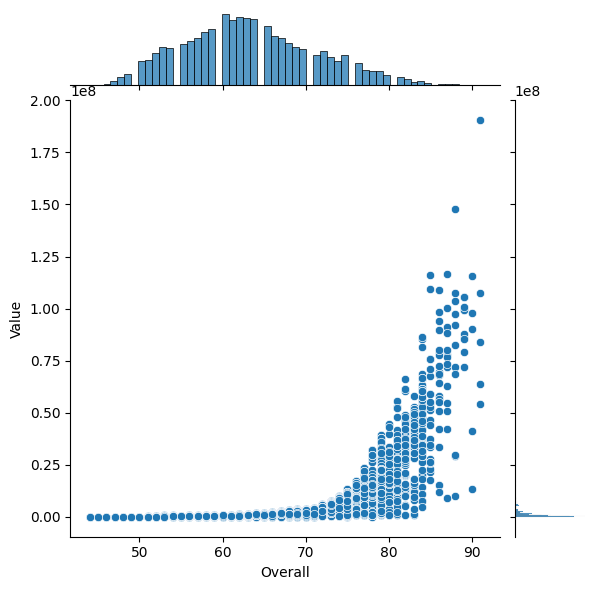

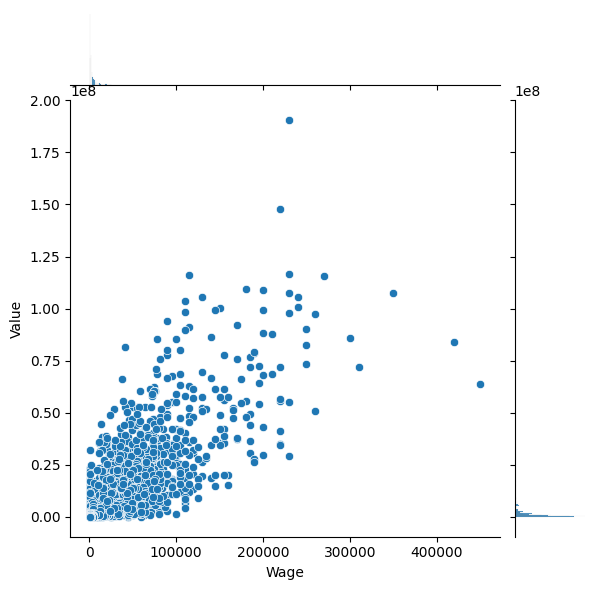

In [146]:
for a in ['Overall' , 'Wage']:
    ax = sns.jointplot(x=df3[a], y=df3.Value, kind='scatter') # ,kind='kde',fill=True)
    ax.ax_joint.set_xlabel(a)
    ax.ax_joint.set_ylabel('Value')
    plt.show()

### Q 1.7 - <span style="color:red">[12]</span> - Determine which one(s) of the attributes `Overall`, `Wage`, and `Value` should be $log$ transformed and apply the transformation. Now, repeat what you did in "Q 1.6" but this time use the transformed version of the attribute(s) where applicable. Make sure to concatenate your original dataframe with the transformed versions of the attributes using different names to avoid overwriting the original attributes.


Hint: For example, you can see that "Value" is highly skewed to the right, therefore, you need to use the transformation for it.

Hint: $log$ transform is often used to normalize skewed distributions.

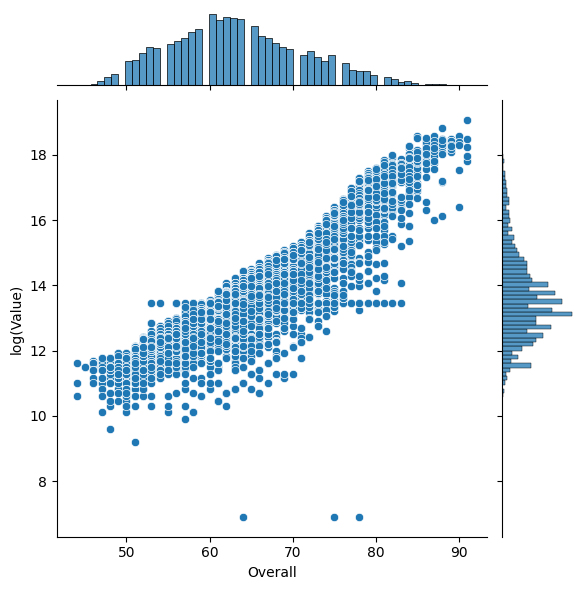

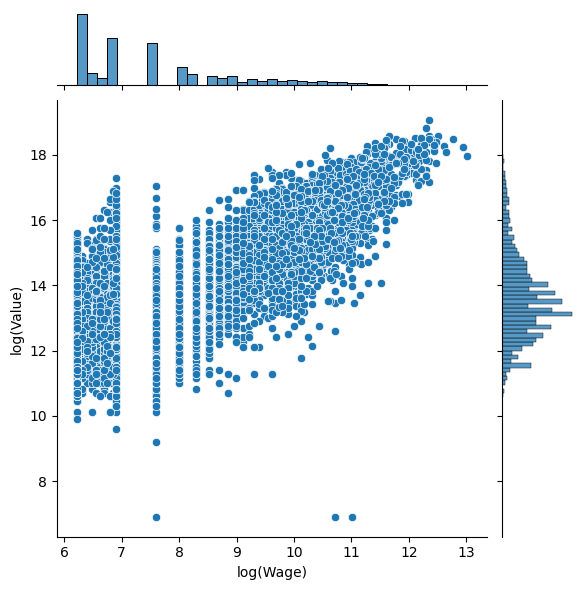

In [147]:
ax = sns.jointplot(x=df3.Overall, y=np.log(df3.Value), kind='scatter')
ax.ax_joint.set_xlabel('Overall')
ax.ax_joint.set_ylabel('log(Value)')
plt.show()

ax = sns.jointplot(x=np.log(df3.Wage), y=np.log(df3.Value), kind='scatter') # ,kind='kde',fill=True)
ax.ax_joint.set_xlabel('log(Wage)')
ax.ax_joint.set_ylabel('log(Value)')
plt.show()

df3['LogValue'] = np.log(df3.Value)
df3['LogWage'] = np.log(df3.Wage)

### Q 1.8 - <span style="color:red">[4]</span> - Use `pandas.corr()` to output

a) the pairwise correlations between every attribute and the original target (*i.e.*, before transformation), and

b) the pairwise correlations between every attribute and the $log$-transformed target.

For each part, the output of your code should be a table with two columns, one listing the attributes excluding the target (or transformed target), and the other column being correlation values in an ascending order.

Once you have the tables, use the mean of the absolute values of the correlations (per table) as a basis to judge whether it is best to use "LogValue" or "Value" as target.

In [148]:
c = df3.corr()

# column indices in c
# Value 3
# LogValue 16

In [149]:
# part a)

print("Correlations between attributes and target Value are:")
print(c.drop(c.iloc[[3, 16]].index)["Value"].sort_values(ascending=True).round(2)) # Excluding Value (3), and LogValue (16)

print("\nWith Value as target:", c.drop(c.iloc[[3, 16]].index)["Value"].abs().mean().round(2))

Correlations between attributes and target Value are:
Position_Reserve           -0.25
Body Type_Normal           -0.06
Preferred Foot_Right       -0.02
Height                      0.03
Weight                      0.06
Position_Forward            0.11
Position_Middle             0.14
Age                         0.17
Weak Foot                   0.17
Body Type_Stocky            0.20
Skill Moves                 0.29
Potential                   0.51
International Reputation    0.54
LogWage                     0.55
Overall                     0.57
Wage                        0.81
Name: Value, dtype: float64

With Value as target: 0.28


In [150]:
# part b)

print("Correlations between attributes and transformed target LogValue are:")
print(c.drop(c.iloc[[3, 16]].index)["LogValue"].sort_values(ascending=True).round(2)) # Excluding Value (3), and LogValue (16)

print("\nWith LogValue as target:", c.drop(c.iloc[[3, 16]].index)["LogValue"].abs().mean().round(2))

Correlations between attributes and transformed target LogValue are:
Position_Reserve           -0.40
Preferred Foot_Right       -0.07
Body Type_Normal           -0.02
Height                      0.03
Weight                      0.08
Body Type_Stocky            0.14
Position_Forward            0.15
Position_Middle             0.23
Weak Foot                   0.27
Age                         0.30
International Reputation    0.42
Skill Moves                 0.47
Wage                        0.63
LogWage                     0.77
Potential                   0.83
Overall                     0.92
Name: LogValue, dtype: float64

With LogValue as target: 0.36


#### *Answer*

it is best to use LogValue. More correlations are being captured.

### Q 1.9 - <span style="color:red">[4]</span> - What were the most positively and negatively correlated features in each table in Q 1.8? How do you interpret the positive and negative correlations?

#### *Answer*

With "Value" as target `Position_Reserve` is the most negatively and `Wage` is the most positively correlated feature.

With "LogValue" as target `Position_Reserve` is the most negatively and `Overall` is the most positively correlated feature.

A positive correlation exists when two variables operate in unison so that when one variable rises or falls, the other does the same. A negative correlation is when two variables move opposite one another so that when one variable rises, the other falls.

### Q 1.10 - <span style="color:red">[15]</span> - Let's train a model to predict the target (*i.e.*, concluded in your answer to Q 1.8):
1. Use `mean_squared_error` to calculate Root Mean Squared Error (RMSE) as your model scorer
2. Split the data into train and test with `test_size=0.4, random_state=seed`
3. Pick `LinearRegression()` from sklearn as your model
4. Report both prediction (*i.e.*, on training set) and generalization (*i.e.*, on test set) RMSE scores of your model

In [151]:
X = df3.drop(['Value', 'LogValue'], axis=1)
y = df3['LogValue']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=seed)

model  = LinearRegression().fit(Xtrain, ytrain)
print("Prediction RMSE: %.5f" % mean_squared_error(ytrain, model.predict(Xtrain), squared=False))

Loss_Test = mean_squared_error(ytest, model.predict(Xtest), squared=False)
print('Generalization RMSE:', Loss_Test.round(5))

Prediction RMSE: 0.30002
Generalization RMSE: 0.29322


### Q 1.11 - <span style="color:red">[8]</span> - Scatter plot `Overall` vs true `LogValue` as well as `Overall` vs predicted `LogValue` in the same graph window over the test set.

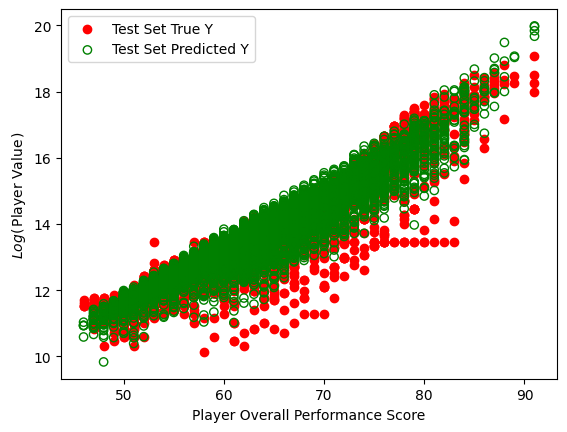

In [152]:
plt.scatter(Xtest.Overall, ytest, c='r', marker='o', label='Test Set True Y')
plt.scatter(Xtest.Overall, model.predict(Xtest), facecolors='none', edgecolors='g', label='Test Set Predicted Y')
plt.xlabel("Player Overall Performance Score")
plt.ylabel(r"$Log(\mathrm{\,Player\,\,Value}\,)$")
plt.legend()
plt.show()

### Q 1.12 - <span style="color:red">[30]</span> - Based on a 90% confidence level, calculate and report the bootstrap confidence interval for the r-squared over test set.

In [153]:
from sklearn.metrics import r2_score
def Bootstrap(X_test, y_test, numboot=200):
    r2_boot = np.zeros(numboot)
    for i in range(numboot):
        X_test_boot = X_test.sample(X_test.shape[0], replace=True)
        y_test_boot = y_test[X_test_boot.index]
        r2_boot[i]  = r2_score(y_test_boot, model.predict(X_test_boot)) # record bootstrap statistic
    return r2_boot

In [154]:
# Bootstrap with CL of 90%

r2_boot = Bootstrap(Xtest, ytest) # bootstrap statistic
r2_s    = r2_score(ytest, model.predict(Xtest))  # sample statistic

boot_CL = 90/100
p_1 = (1-boot_CL)/2
p_2 = 1-p_1
boot_quant = np.quantile(r2_boot-r2_s, [p_1, p_2])

boot_ci = [((r2_s - boot_quant[1])).round(3),
           ((r2_s - boot_quant[0])).round(3)]
print("Boot confidence interval is", boot_ci)

Boot confidence interval is [0.95, 0.957]


### Q 1.13 - <span style="color:red">[10]</span> - Plot the `kde` distribution of the bootstrap statistic and overlay it with two vertical lines indicating the lower and upper bounds of the CI.

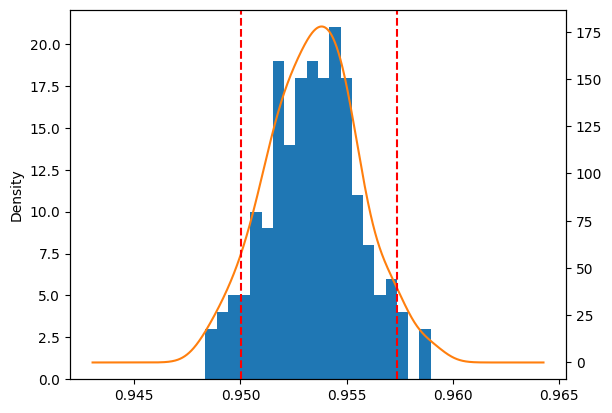

In [155]:
bm = pd.DataFrame(data=(r2_boot), columns=['Difference'])
ax = bm['Difference'].plot(kind='hist', bins=20)
bm['Difference'].plot(kind='kde', ax=ax, secondary_y=True)
plt.axvline(x=r2_s - boot_quant[1], color='red', linestyle='--')
plt.axvline(x=r2_s - boot_quant[0], color='red', linestyle='--')
plt.show()